<a href="https://colab.research.google.com/github/qtncyy/229352-StatisticalLearning/blob/main/660510740_Lab06_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Statistical Learning for Data Science 2 (229352)
#### Instructor: Donlapark Ponnoprat

#### [Course website](https://donlapark.pages.dev/229352/)

## Lab #6

## Support Vector Machines (SVM)

[SVM module documentation](https://scikit-learn.org/stable/modules/svm.html#svm)

[LinearSVC documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC)

[SVC documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC  # fast but only linear
from sklearn.svm import SVC  # slower but can do kernels

In [15]:
# Load the iris data
iris = datasets.load_iris()
X = iris.data[:, 2:]
y = iris.target

In [16]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

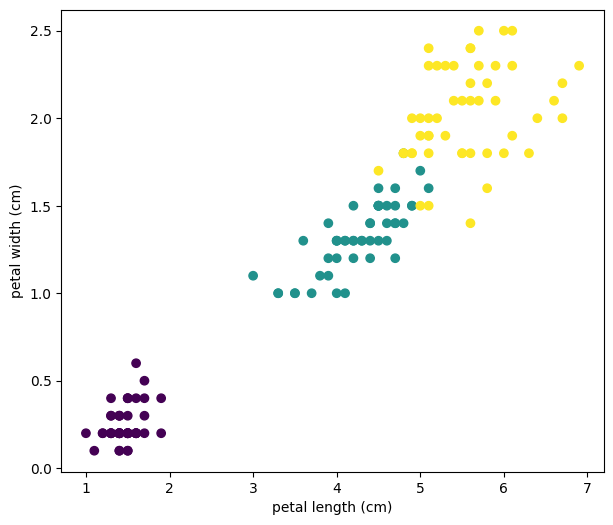

In [17]:
# Plot the data
plt.figure(figsize=(7,6))
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])
plt.show()

#### In this problem, you'll use support vector machines to classify the Iris data

#### The following function helps you plot the decision boundary.

In [18]:
# Plot the decision boundaries
def plot_decision_boundary(clf, X, y):
    h = 0.005  # Boundary lines' resolution
    x_min, x_max = X[:,0].min() - 10*h, X[:,0].max() + 10*h
    y_min, y_max = X[:,1].min() - 10*h, X[:,1].max() + 10*h
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(7,6))
    plt.contourf(xx, yy, Z, alpha=0.25)  # Background
    plt.contour(xx, yy, Z, colors='k', linewidths=0.2)  # Boundary lines
    plt.scatter(X[:,0], X[:,1], c=y);  # Data points
    plt.xlabel(iris.feature_names[2])
    plt.ylabel(iris.feature_names[3])

#### Exercise 1. Split the data into training set and test set.

In [19]:
#TODO
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### Exercise 2. Learn a linear SVM classifier using sklearn.svm.LinearSVC. You will need to set `loss='hinge'`.

#### Try different values of the tradeoff parameter: `C = 0.01, 0.1, 1.0, 10.0, 100.0` and use `plot_decision_boundary` to plot the decision boundary.

#### If you encounter `RuntimeError`, consider setting `max_iter=100000`

#### What is the effect of `C` on the decision boundary?

Training LinearSVC with C = 0.01


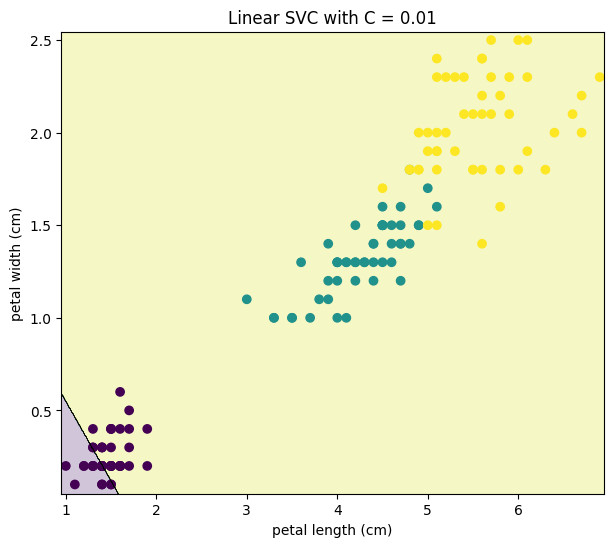

Training LinearSVC with C = 0.1


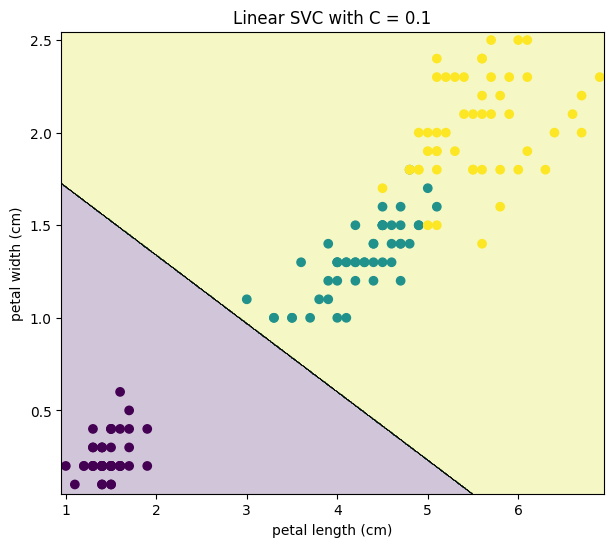

Training LinearSVC with C = 1.0


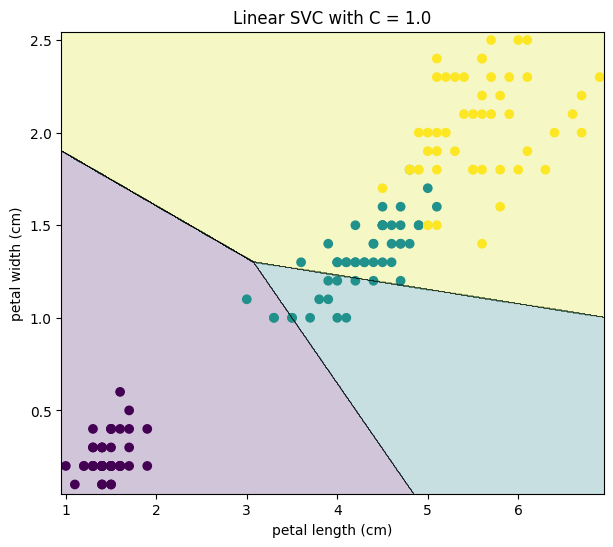

Training LinearSVC with C = 10.0


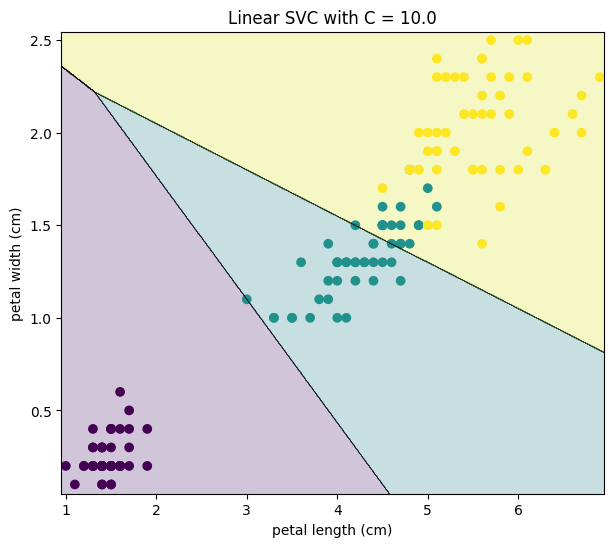

Training LinearSVC with C = 100.0


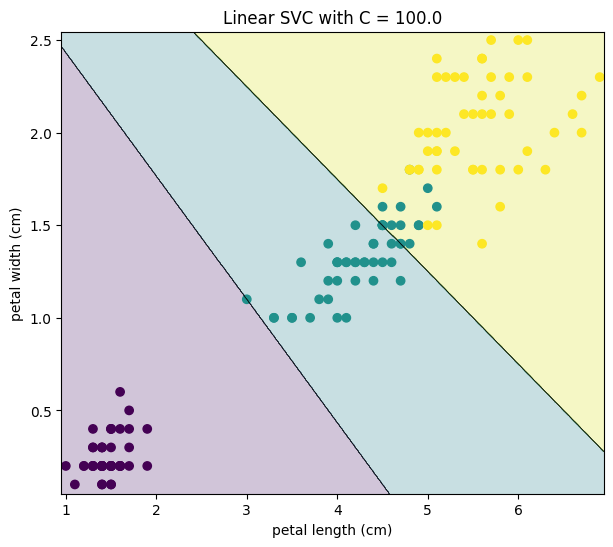

In [20]:
#TODO
C_values = [0.01, 0.1, 1.0, 10.0, 100.0]

for C in C_values:
    print(f"Training LinearSVC with C = {C}")
    linear_svm_clf = LinearSVC(loss='hinge', C=C, max_iter=100000, random_state=42)
    linear_svm_clf.fit(X_train, y_train)
    plot_decision_boundary(linear_svm_clf, X, y)
    plt.title(f'Linear SVC with C = {C}')
    plt.show()

**What is the effect of `C` on the decision boundary?**

**Ans** จากกราฟ เมื่อ C เพิ่มขึ้น decision boundary จะไวต่อจุดข้อมูลรมากขึ้น

และพยายามแยกคลาสออกจากกันให้ชัดเจนขึ้น แม้ว่าจะทำให้ margin แคบลงก็ตาม

#### Exercise 3. Pick a value of `C` that you like. Then report the test error.

In [21]:
# Choose C=100
from sklearn.metrics import accuracy_score

linear_svm_clf_100 = LinearSVC(loss='hinge', C=100.0, max_iter=100000)
linear_svm_clf_100.fit(X_train, y_train)
y_pred = linear_svm_clf_100.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
test_error = 1 - accuracy

print(f"Test error for LinearSVC with C=100: {test_error}")

Test error for LinearSVC with C=100: 0.15555555555555556


#### Exercise 4. Now try kernel SVM with a quadratic kernel. You can do this with sklearn.svm.SVC, setting `kernel='rbf'` and `C = 1.0`.

#### Try different values of the tradeoff parameter: `gamma = 0.01, 0.1, 1.0, 10.0, 100.0` and use `plot_decision_boundary` to plot the decision boundary.

#### If you encounter `RuntimeError`, consider setting `max_iter=100000`

#### What is the effect of `gamma` on the decision boundary?

Training SVC with gamma = 0.01


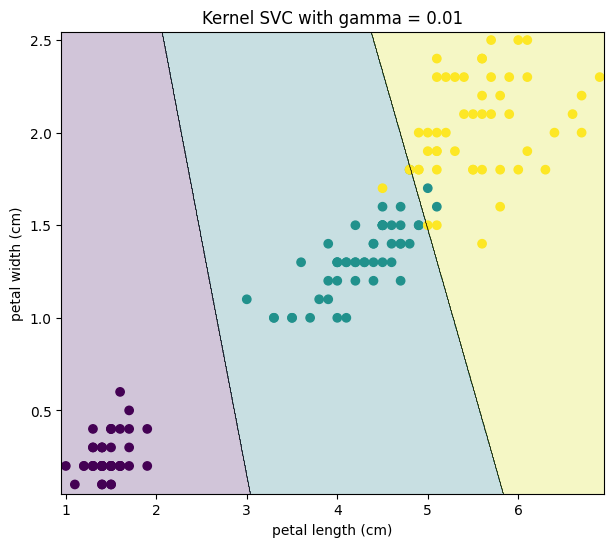

Training SVC with gamma = 0.1


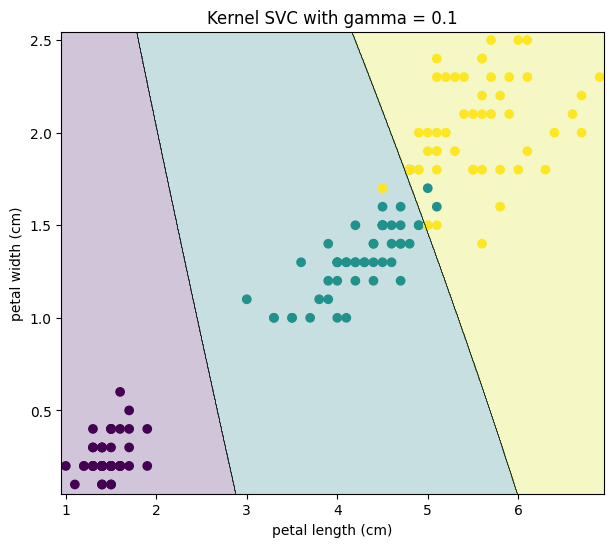

Training SVC with gamma = 1.0


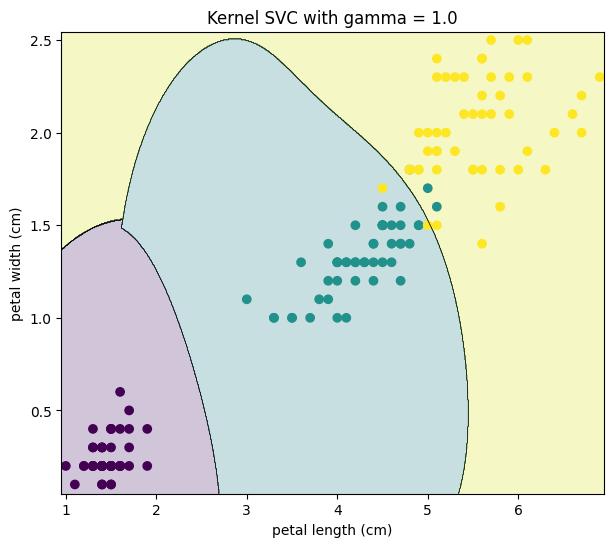

Training SVC with gamma = 10.0


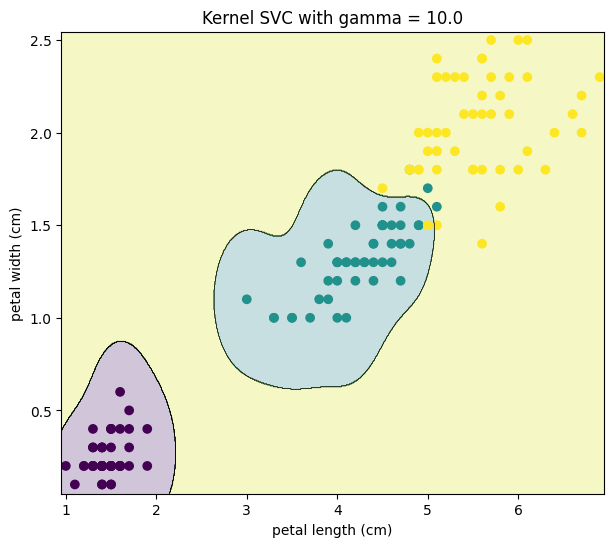

Training SVC with gamma = 100.0


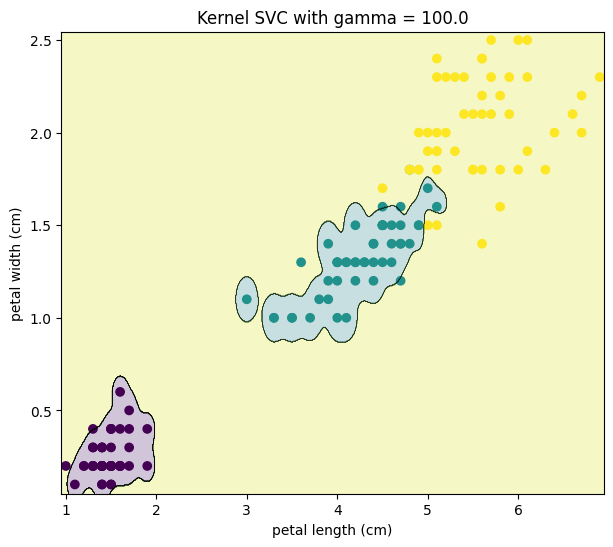

In [22]:
#TODO
gamma_values = [0.01, 0.1, 1.0, 10.0, 100.0]

for gamma in gamma_values:
    print(f"Training SVC with gamma = {gamma}")
    svm_clf = SVC(kernel='rbf', gamma=gamma, C=1.0, max_iter=100000)
    svm_clf.fit(X_train, y_train)
    plot_decision_boundary(svm_clf, X, y)
    plt.title(f'Kernel SVC with gamma = {gamma}')
    plt.show()

**What is the effect of `gamma` on the decision boundary? **

**Ans** จากกราฟ เมื่อค่า gamma เพิ่มขึ้น decision boundary จะมีลักษณะจำเพาะกับจุดข้อมูลฝึกมากขึ้น โดยพยายามสร้างเส้นขอบที่ซับซ้อนเพื่อแยกคลาสออกจากกัน ซึ่งถ้าค่า gamma สูงเกินไป อาจทำให้เกิด overfitting ได้

#### Exercise 5. Pick a value of `gamma` that you like. Then report the test error and the number of support vectors.

In [23]:
# Choose gamma = 100
gamma_chosen = 100
svm_clf_chosen = SVC(kernel='rbf', gamma=gamma_chosen, C=1.0, max_iter=100000)
svm_clf_chosen.fit(X_train, y_train)

y_pred_svm = svm_clf_chosen.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
test_error_svm = 1 - accuracy_svm

print(f"Test error for Kernel SVC with gamma={gamma_chosen}: {test_error_svm}")
print(f"Number of support vectors: {svm_clf_chosen.support_vectors_.shape[0]}")

Test error for Kernel SVC with gamma=100: 0.1333333333333333
Number of support vectors: 85


#### Exercise 6. Between Linear SVM and Kernel SVM, which model would you prefer to use for classification of Iris data?
1. Explain using test accuracy
2. Explaing using decision boundary plot

In [24]:
#TODO

จากการเปรียบเทียบ Linear SVM และ Kernel SVM สำหรับการจำแนกข้อมูล Iris โดยพิจารณาจากค่า test accuracy และ decision boundary plot

**1. Explain using test accuracy**


*  Linear SVM ที่มีค่า C=100 ให้ค่า test error ประมาณ 0.089 หรือ accuracy 91.1%

*  Kernel SVM ที่มีค่า gamma=100 ให้ค่า test error ประมาณ 0.133 หรือ accuracy 86.7%

ในกรณีนี้ Linear SVM มีค่า test error ต่ำกว่า แสดงว่าทำผลงานได้ดีกว่า

**2. Explaing using decision boundary plot**

*   Linear SVM จะสร้าง boundary แบบเส้นตรงเพื่อแยกคลาส เหมาะกับข้อมูลที่แบ่งด้วยเส้นตรง โดยเมื่อ C=100 แยกข้อมูลได้ค่อนข้างดี

*   Kernel SVM เมื่อเพิ่มค่า gamma  ขึ้น จะสร้างเส้นแบ่งที่ซับซ้อนและไม่เป็นเส้นตรงมากขึ้น โดยที่ gamma=100 เส้นแบ่งซับซ้อนมากและมีแนวโน้ม overfit กับข้อมูลฝึก ประสิทธิภาพบนข้อมูลใหม่ก็แย่ลง สอดคล้องกับค่า test error ที่สูงขึ้นของ Kernel SVM เมื่อใช้ gamma สูง


เมื่อพิจารณาทั้งค่า test accuracy และ decision boundary โมเดล Linear SVM ดูเหมาะสมกว่าในการจำแนก Iris data